# 1.資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
#x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [0]:
x_Train4D=x_Train.reshape(-1,28,28,1).astype('float32')
x_Test4D=x_Test.reshape(-1,28,28,1).astype('float32')

In [0]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [6]:
print('Train:',x_Train4D_normalize.shape)
print('Test:',x_Test4D_normalize.shape)

Train: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)


In [0]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [9]:
model = Sequential()

W0629 08:02:32.940435 140390067730304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',
                 input_shape=(28,28,1), activation='relu'))

W0629 08:02:32.990832 140390067730304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0629 08:02:33.009200 140390067730304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0629 08:02:33.063126 140390067730304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',
                 activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128, activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

W0629 08:02:33.239785 140390067730304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0629 08:02:33.274824 140390067730304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [19]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=10, batch_size=300,verbose=1)

W0629 08:02:33.443122 140390067730304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0629 08:02:33.531418 140390067730304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 183us/step - loss: 0.3599 - acc: 0.8984 - val_loss: 0.1062 - val_acc: 0.9686
Epoch 2/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0870 - acc: 0.9734 - val_loss: 0.0663 - val_acc: 0.9802
Epoch 3/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0589 - acc: 0.9821 - val_loss: 0.0567 - val_acc: 0.9829
Epoch 4/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0451 - acc: 0.9860 - val_loss: 0.0551 - val_acc: 0.9843
Epoch 5/10
48000/48000 [==============================] - 3s 56us/step - loss: 0.0361 - acc: 0.9896 - val_loss: 0.0474 - val_acc: 0.9863
Epoch 6/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0309 - acc: 0.9903 - val_loss: 0.0471 - val_acc: 0.9859
Epoch 7/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0261 - acc: 0.9920 - val_loss: 0.0437 - val_ac

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

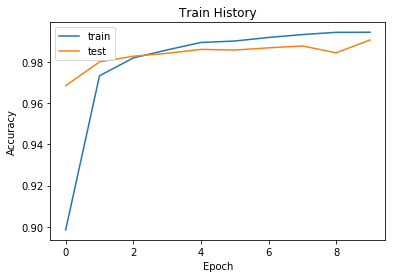

In [21]:
show_train_history('acc','val_acc')

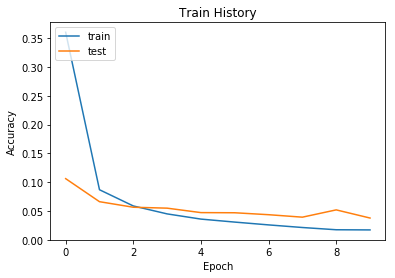

In [22]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 81us/step


0.9913

# 預測結果

In [0]:
prediction=model.predict_classes(x_Test4D_normalize)

In [25]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

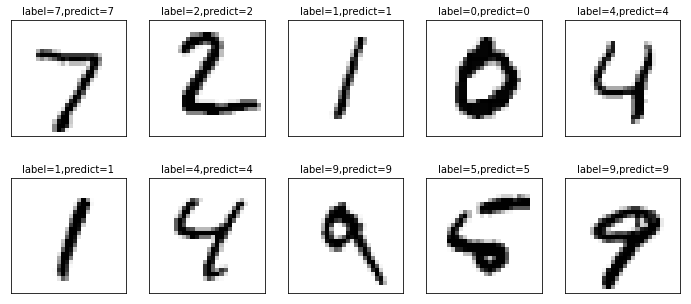

In [27]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [28]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,1,1,0,1,1,0,1,0
1,0,1129,2,1,0,0,1,1,1,0
2,0,0,1028,0,1,0,0,3,0,0
3,0,0,0,1004,0,4,0,0,0,2
4,0,0,1,0,978,0,0,0,1,2
5,1,0,1,7,0,880,1,0,0,2
6,4,2,0,1,1,3,947,0,0,0
7,0,1,8,1,0,0,0,1012,1,5
8,1,0,4,3,0,2,0,1,958,5


In [0]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [30]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2369,5,3
2597,5,3
2810,5,3
5937,5,3
